# Input Data

Input .xlsx Files (CCPP)

In [0]:
!git clone https://github.com/ParkYouJin/DataStatisticsHomework.git
%cd /content/DataStatisticsHomework/CCPP
!ls

Cloning into 'DataStatisticsHomework'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 7 (delta 1), reused 7 (delta 1), pack-reused 0
Unpacking objects: 100% (7/7), done.
/content/DataStatisticsHomework/CCPP
Folds5x2_pp.ods  Folds5x2_pp.xlsx  Readme.txt  Readme.txt~


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from scipy import stats
import statistics
from sklearn import linear_model

# check data set

In [0]:
#using the ExcelFile class
xls = pd.ExcelFile('Folds5x2_pp.xlsx')
data1 = xls.parse('Sheet1',index_col=None, header=0, na_values=['NA'])
data1.head()
len(data1)
len(data1.columns)

data2 = xls.parse('Sheet2',index_col=None, header=0, na_values=['NA'])
data3 = xls.parse('Sheet3',index_col=None, header=0, na_values=['NA'])
data4 = xls.parse('Sheet4',index_col=None, header=0, na_values=['NA'])
data5 = xls.parse('Sheet5',index_col=None, header=0, na_values=['NA'])

data2.head()
data3.head()
data4.head()
data5.head()

# I check all five sheets, but actually only one sheet was needed, so I chose data 1 as my study
data = pd.DataFrame(data1)

temperature = data['AT']
vacuum = data['V']
pressure = data['AP']
humidity = data['RH']
energy = data['PE']

# visualize distribution of data 


## 1. check distribution using histogram and boxplot

In [0]:
vacuum.mode()

0    41.17
1    70.32
dtype: float64

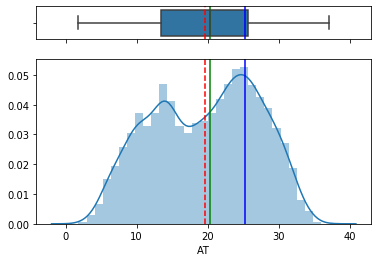

In [0]:
# Temerature distribution

f, (ax_box,ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})

sns.boxplot(temperature, ax=ax_box)
ax_box.axvline(temperature.mean(), color='r', linestyle='--')
ax_box.axvline(temperature.median(), color='g', linestyle='-')
ax_box.axvline(float(temperature.mode()), color='b', linestyle='-')

sns.distplot(temperature,ax=ax_hist)
ax_hist.axvline(temperature.mean(), color='r', linestyle='--')
ax_hist.axvline(temperature.median(), color='g', linestyle='-')
ax_hist.axvline(float(temperature.mode()), color='b', linestyle='-')

#plt.legend({'Mean':temperature.mean(),"Median":temperature.median(),'Mode'=float(temperature.mode() )})
ax_box.set(xlabel='')
plt.show()

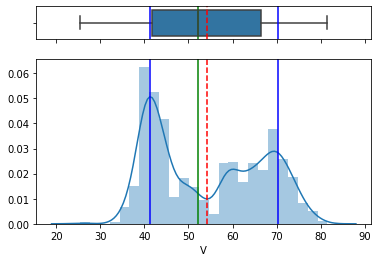

In [0]:
# vacuum distribition

f, (ax_box,ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})

sns.boxplot(vacuum, ax=ax_box)
ax_box.axvline(vacuum.mean(), color='r', linestyle='--')
ax_box.axvline(vacuum.median(), color='g', linestyle='-')
ax_box.axvline(vacuum.mode()[0], color='b', linestyle='-')
ax_box.axvline(vacuum.mode()[1], color='b', linestyle='-')

sns.distplot(vacuum,ax=ax_hist)
ax_hist.axvline(vacuum.mean(), color='r', linestyle='--')
ax_hist.axvline(vacuum.median(), color='g', linestyle='-')
ax_hist.axvline(vacuum.mode()[0], color='b', linestyle='-')
ax_hist.axvline(vacuum.mode()[1], color='b', linestyle='-')

#plt.legend({'Mean':vacuum.mean(),"Median":vacuum.median(),'Mode'=float(vacuum.mode())})
ax_box.set(xlabel='')
plt.show()

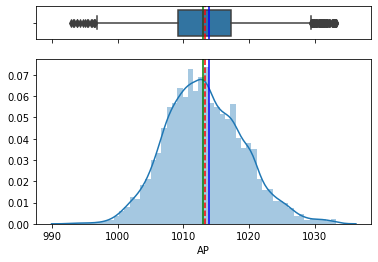

In [0]:
# pressure distribution

f, (ax_box,ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})

sns.boxplot(pressure, ax=ax_box)
ax_box.axvline(pressure.mean(), color='r', linestyle='--')
ax_box.axvline(pressure.median(), color='g', linestyle='-')
ax_box.axvline(pressure.mode()[0], color='b', linestyle='-')
#ax_box.axvline(pressure.mode()[1], color='b', linestyle='-')

sns.distplot(pressure,ax=ax_hist)
ax_hist.axvline(pressure.mean(), color='r', linestyle='--')
ax_hist.axvline(pressure.median(), color='g', linestyle='-')
ax_hist.axvline(pressure.mode()[0], color='b', linestyle='-')
#ax_hist.axvline(pressure.mode()[1], color='b', linestyle='-')

#plt.legend({'Mean':pressure.mean(),"Median":pressure.median(),'Mode'=float(pressure.mode())})
ax_box.set(xlabel='')
plt.show()

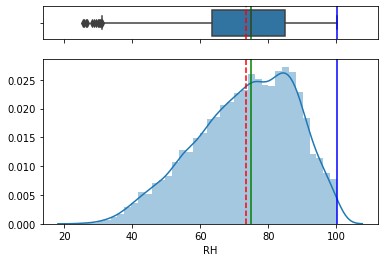

In [0]:
# humidity distribution

f, (ax_box,ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})

sns.boxplot(humidity, ax=ax_box)
ax_box.axvline(humidity.mean(), color='r', linestyle='--')
ax_box.axvline(humidity.median(), color='g', linestyle='-')
ax_box.axvline(humidity.mode()[0], color='b', linestyle='-')
#ax_box.axvline(humidity.mode()[1], color='b', linestyle='-')

sns.distplot(humidity,ax=ax_hist)
ax_hist.axvline(humidity.mean(), color='r', linestyle='--')
ax_hist.axvline(humidity.median(), color='g', linestyle='-')
ax_hist.axvline(humidity.mode()[0], color='b', linestyle='-')
#ax_hist.axvline(humidity.mode()[1], color='b', linestyle='-')

#plt.legend({'Mean':humidity.mean(),"Median":humidity.median(),'Mode'=float(humidity.mode())})
ax_box.set(xlabel='')
plt.show()

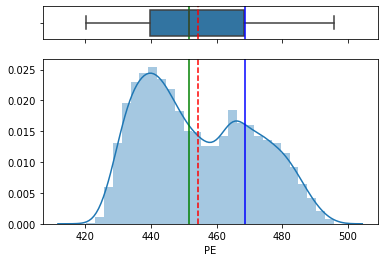

In [0]:
# energy distribution

f, (ax_box,ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})

sns.boxplot(energy, ax=ax_box)
ax_box.axvline(energy.mean(), color='r', linestyle='--')
ax_box.axvline(energy.median(), color='g', linestyle='-')
ax_box.axvline(energy.mode()[0], color='b', linestyle='-')
#ax_box.axvline(energy.mode()[1], color='b', linestyle='-')


sns.distplot(energy,ax=ax_hist)
ax_hist.axvline(energy.mean(), color='r', linestyle='--')
ax_hist.axvline(energy.median(), color='g', linestyle='-')
ax_hist.axvline(energy.mode()[0], color='b', linestyle='-')
#ax_hist.axvline(energy.mode()[1], color='b', linestyle='-')


#plt.legend({'Mean':energy.mean(),"Median":energy.median(),'Mode'=float(energy.mode())})
ax_box.set(xlabel='')
plt.show()

In [0]:
# describe
data1.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [315]:
data1.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [207]:
# summary statistics
from scipy.stats import skew
from scipy.stats import kurtosis 

data1.head()

data_stat = {"Mean" : data1.apply(lambda x: x.mean()),
             "Variance" : data1.apply(lambda x: statistics.variance(x)),
             "Std" : data1.apply(lambda x: np.std(x)),
             "Median" : data1.apply(lambda x: x.median()),
             "Mode" : data1.apply(lambda x: x.mode()[0]),
             "Q1" : data1.apply(lambda x: np.percentile(x,25)),
             "Q3" : data1.apply(lambda x: np.percentile(x,75)),
             "IQR" : Q3-Q1,
             "Whisker" : 1.5*IQR,
             "UpperLimit" : Q3 + Whisker,
             "LowerLimit" : Q1 - Whisker,
             "Range" : data1.apply(lambda x: np.ptp(x)),
             "Skewness" : data1.apply(lambda x: skew(x)),
             "Kurtosis" : data1.apply(lambda x: kurtosis(x))}

dataframe_statistics = pd.DataFrame(data_stat)
dataframe_statistics

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,Mean,Variance,Std,Median,Mode,Q1,Q3,IQR,Whisker,UpperLimit,LowerLimit,Range,Skewness,Kurtosis
AT,19.651231,55.539357,7.452084,20.345,25.21,13.5100,25.72,12.2100,18.31500,44.03500,-4.80500,35.30,-0.136372,-1.037634
V,54.305804,161.490544,12.707229,52.080,41.17,41.7400,66.54,24.8000,37.20000,103.74000,4.54000,56.20,0.198490,-1.444209
AP,1013.259078,35.269152,5.938473,1012.940,1013.88,1009.1000,1017.26,8.1600,12.24000,1029.50000,996.86000,40.41,0.265403,0.093561
RH,73.308978,213.167848,14.599506,74.975,100.09,63.3275,84.83,21.5025,32.25375,117.08375,31.07375,74.60,-0.431771,-0.444921
PE,454.365009,291.282318,17.066103,451.550,468.80,439.7500,468.43,28.6800,43.02000,511.45000,396.73000,75.50,0.306461,-1.048600


In [220]:
#check outlier

temp_Outlier = list(filter(lambda x:(x > dataframe_statistics.loc["AT","UpperLimit"]) or (x < dataframe_statistics.loc["AT","LowerLimit"]), data1["AT"]))
print(temp_Outlier)

vacuum_Outlier = list(filter(lambda x:(x > dataframe_statistics.loc["V","UpperLimit"]) or (x < dataframe_statistics.loc["V","LowerLimit"]), data1["V"]))
print(vacuum_Outlier)

pressure_Outlier = list(filter(lambda x:(x > dataframe_statistics.loc["AP","UpperLimit"]) or (x < dataframe_statistics.loc["AP","LowerLimit"]), data1["AP"]))
print(pressure_Outlier)

humidity_Outlier = list(filter(lambda x:(x > dataframe_statistics.loc["RH","UpperLimit"]) or (x < dataframe_statistics.loc["RH","LowerLimit"]), data1["RH"]))
print(humidity_Outlier)

energy_Outlier = list(filter(lambda x:(x > dataframe_statistics.loc["PE","UpperLimit"]) or (x < dataframe_statistics.loc["PE","LowerLimit"]), data1["PE"]))
print(energy_Outlier)

[]
[]
[1030.46, 1033.25, 1030.18, 1031.1, 1029.65, 1029.8, 1033.04, 1033.3, 1032.67, 1033.08, 994.17, 995.88, 995.24, 1031.55, 996.32, 1029.6, 1030.3, 1031.5, 1030.94, 996.55, 1030.83, 1031.96, 996.35, 1031.01, 1030.77, 1032.98, 1032.93, 1031.33, 996.03, 1030.86, 1030.72, 1033.19, 1031.96, 1030.42, 1032.86, 1032.77, 1029.63, 1033.09, 1030.82, 1029.99, 1031.8, 1032.08, 993.31, 1033.14, 1029.54, 1032.88, 1029.7, 1030.81, 1030.0, 995.45, 1030.2, 1032.72, 1031.45, 1032.14, 1029.91, 995.02, 1031.14, 993.82, 1032.83, 1032.37, 1032.16, 1031.16, 1030.72, 1029.9, 994.6, 1030.1, 1029.61, 993.74, 1031.39, 1031.2, 1031.27, 1030.38, 1031.97, 1033.29, 1031.58, 1031.08, 993.11, 1031.75, 1029.54, 1029.7, 1031.21, 1031.34, 1030.68, 992.89, 1031.71, 1031.21, 1031.32, 1030.61]
[25.89, 28.16, 29.43, 26.67, 29.86, 30.59, 25.56, 30.83, 28.81, 26.3, 30.34, 30.99]
[]


## 2. check normal distribution

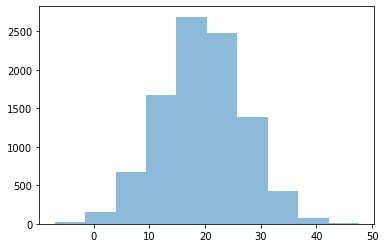

In [230]:
'''Check if the distribution is normal.'''
# using histogram and QQline, check temperature normality
numData = len(data1["AT"])
data = stats.norm.rvs(data1["AT"].mean(), data1["AT"].std(), size=numData)
plt.hist(data, alpha = 0.5)
plt.show()

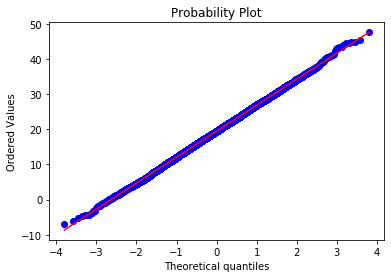

In [247]:
#using QQline, check temperature normality
import pylab
_ = stats.probplot(data, plot=plt)

In [263]:
# The scipy "normaltest" is based on D’Agostino and Pearson’s test that
# combines skew and kurtosis to produce an omnibus test of normality.
_, pVal = stats.normaltest(data)

# Or you can check for normality with Kolmogorov-Smirnov test: but this is only advisable for large sample numbers!
#_,pVal = stats.kstest((data-np.mean(data))/np.std(data,ddof=1), 'norm')

if pVal > 0.05:
  print('Data are probably normally distributed')
  print(pVal)

Data are probably normally distributed
0.12503319935285467


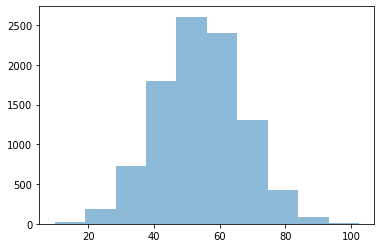

In [252]:
# using histogram and QQline, check vacuum normality
numData = len(data1["V"])
data = stats.norm.rvs(data1["V"].mean(), data1["V"].std(), size=numData)
plt.hist(data, alpha = 0.5)
plt.show()

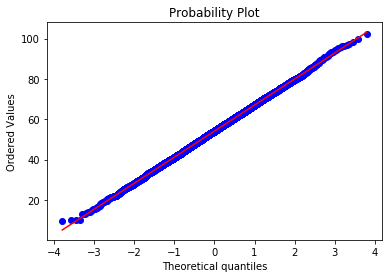

In [254]:
#using QQline, check pressure normality
import pylab
_ = stats.probplot(data, plot = plt)

In [264]:
# The scipy "normaltest" is based on D’Agostino and Pearson’s test that
# combines skew and kurtosis to produce an omnibus test of normality.
_, pVal = stats.normaltest(data)

# Or you can check for normality with Kolmogorov-Smirnov test: but this is only advisable for large sample numbers!
#_,pVal = stats.kstest((data-np.mean(data))/np.std(data,ddof=1), 'norm')

if pVal > 0.05:
  print('Data are probably normally distributed')
  print(pVal)

Data are probably normally distributed
0.12503319935285467


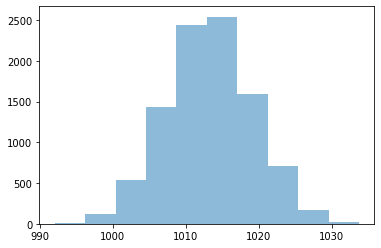

In [256]:
# using histogram and QQline, check pressure normality
numData = len(data1["AP"])
data = stats.norm.rvs(data1["AP"].mean(), data1["AP"].std(), size=numData)
plt.hist(data, alpha = 0.5)
plt.show()

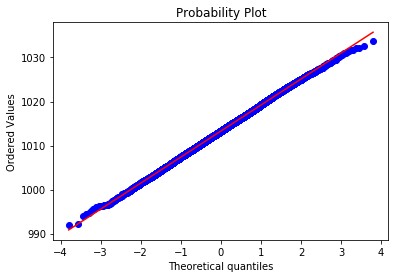

In [257]:
_ = stats.probplot(data, plot=plt)

In [262]:
# The scipy "normaltest" is based on D’Agostino and Pearson’s test that
# combines skew and kurtosis to produce an omnibus test of normality.
_, pVal = stats.normaltest(data)

# Or you can check for normality with Kolmogorov-Smirnov test: but this is only advisable for large sample numbers!
#_,pVal = stats.kstest((data-np.mean(data))/np.std(data,ddof=1), 'norm')

if pVal > 0.05:
  print('Data are probably normally distributed')
  print(pVal)

Data are probably normally distributed
0.12503319935285467


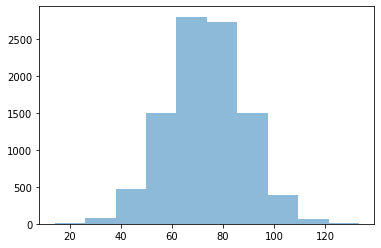

In [266]:
# using histogram and QQline, check humidity normality
numData = len(data1["RH"])
data = stats.norm.rvs(data1["RH"].mean(), data1["RH"].std(), size=numData)
plt.hist(data, alpha = 0.5)
plt.show()

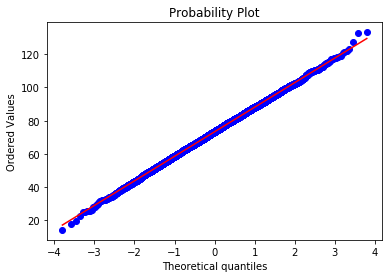

In [268]:
_ = stats.probplot(data, plot=plt)

In [269]:
# The scipy "normaltest" is based on D’Agostino and Pearson’s test that
# combines skew and kurtosis to produce an omnibus test of normality.
_, pVal = stats.normaltest(data)

# Or you can check for normality with Kolmogorov-Smirnov test: but this is only advisable for large sample numbers!
#_,pVal = stats.kstest((data-np.mean(data))/np.std(data,ddof=1), 'norm')

if pVal > 0.05:
  print('Data are probably normally distributed')
  print(pVal)

Data are probably normally distributed
0.2635324035275782


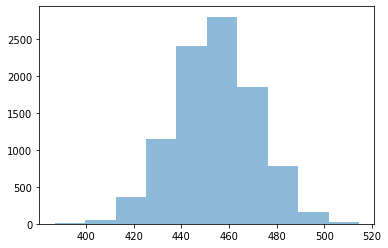

In [271]:
# using histogram and QQline, check energy normality
numData = len(data1["PE"])
data = stats.norm.rvs(data1["PE"].mean(), data1["PE"].std(), size=numData)
plt.hist(data, alpha = 0.5)
plt.show()

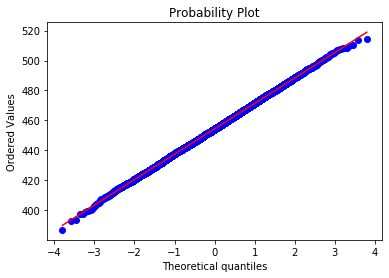

In [272]:
#using QQline, check energy normality
_ = stats.probplot(data, plot=plt)

In [273]:
# The scipy "normaltest" is based on D’Agostino and Pearson’s test that
# combines skew and kurtosis to produce an omnibus test of normality.
_, pVal = stats.normaltest(data)

# Or you can check for normality with Kolmogorov-Smirnov test: but this is only advisable for large sample numbers!
#_,pVal = stats.kstest((data-np.mean(data))/np.std(data,ddof=1), 'norm')

if pVal > 0.05:
  print('Data are probably normally distributed')
  print(pVal)

Data are probably normally distributed
0.8058596338140328


## 3. Relationship between variables

### (1) Relationship between variables

In [0]:
df = data1
corr = df.corr(method = 'pearson') 
print(corr)

''' interpretate 
* +/-0.7 - +/-1.0 : strong positive/negative
* +/-0.3- +/-0.7 : moderate positive/negative
* +/-0.1 - +/-0.3 : weak positive/negative
* 0- +/- 1.0 : no relationship

- Temp and vacuum : Strong positive corr
- Temp and pressure : modearte negative corr
- Temp and humidity : moderate negative corr
- Temp and energy : Strongly positive corr
- Vacuum and Pressure : modearte negative corr
- Vacuum and humidity : modeare negative correlation
- Vacuum and energy : Strongly negative corr
- Pressure and humidity : no corr
- Pressure and energy : modeare positive corr
- Humidity and energy : modeare positive corr
'''

          AT         V        AP        RH        PE
AT  1.000000  0.844107 -0.507549 -0.542535 -0.948128
V   0.844107  1.000000 -0.413502 -0.312187 -0.869780
AP -0.507549 -0.413502  1.000000  0.099574  0.518429
RH -0.542535 -0.312187  0.099574  1.000000  0.389794
PE -0.948128 -0.869780  0.518429  0.389794  1.000000


### (2) scatter plot 

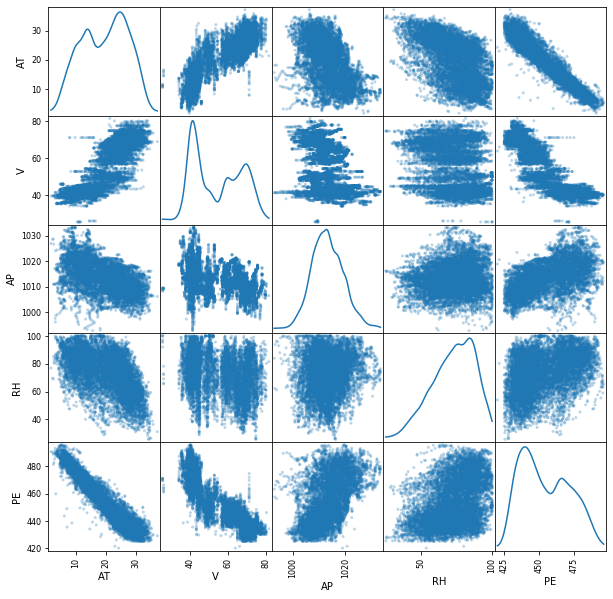

In [0]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha = 0.3, figsize = (10,10), diagonal = 'kde')
plt.show()

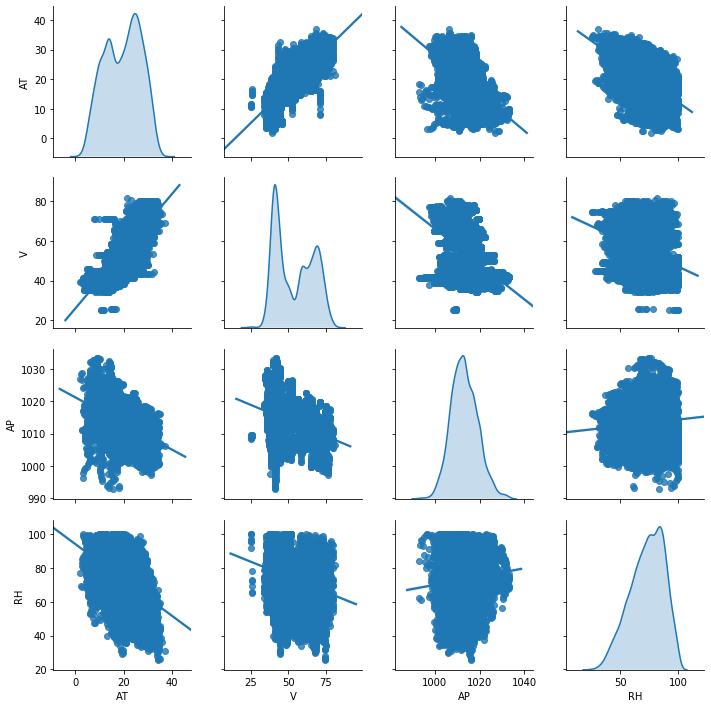

In [274]:
sns.pairplot(data1, vars = data1.columns[:-1], kind = "reg",  diag_kind='kde')

In [0]:
### lienar regression
regr = linear_model.LinearRegression()
regr.fit(temperature.reshape([-1,1]), energy.reshape([-1.1]))


# basic scatter plot
plt.scatter(data1['AT'],data1['PE'], s = 1, c = 'blue', alpha = 0.3)

# strings (label)
xlab = 'Temperature'
ylab = 'Electrical energy output'

# add axis labels
plt.xlabel(xlab)
plt.ylabel(ylab)

# display
plt.show()

AttributeError: ignored

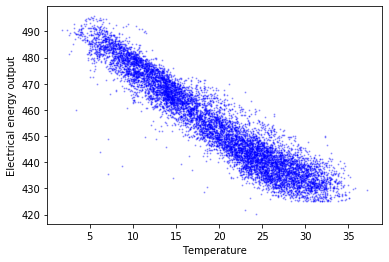

In [316]:
# basic scatter plot
plt.scatter(data1['AT'],data1['PE'], s = 1, c = 'blue', alpha = 0.3)

# strings (label)
xlab = 'Temperature'
ylab = 'Electrical energy output'

# add axis labels
plt.xlabel(xlab)
plt.ylabel(ylab)

# display
plt.show()

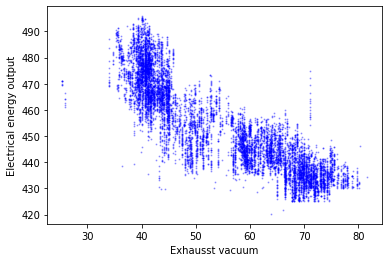

In [0]:
# basic scatter plot
plt.scatter(data1['V'],data1['PE'], s = 1, c = 'blue', alpha = 0.3)

# strings (label)
xlab = 'Exhausst vacuum'
ylab = 'Electrical energy output'

# add axis labels
plt.xlabel(xlab)
plt.ylabel(ylab)

# display
plt.show()

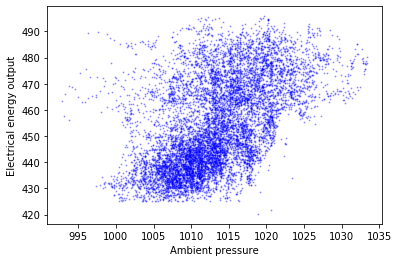

In [0]:
# basic scatter plot
plt.scatter(data1['AP'],data1['PE'], s = 1, c = 'blue', alpha = 0.3)

# strings (label)
xlab = 'Ambient pressure'
ylab = 'Electrical energy output'

# add axis labels
plt.xlabel(xlab)
plt.ylabel(ylab)

# display
plt.show()

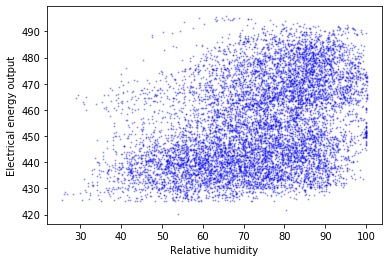

In [0]:
# basic scatter plot
plt.scatter(data1['RH'],data1['PE'], s = 1, c = 'blue', alpha = 0.3)

# strings (label)
xlab = 'Relative humidity'
ylab = 'Electrical energy output'

# add axis labels
plt.xlabel(xlab)
plt.ylabel(ylab)

# display
plt.show()

## hypothesis test

In [276]:
all = data1["PE"]
first = all.head(1000)
last = all.tail(1000)

print(all.mean())
print(first.mean())
print(last.mean())

454.3650094063554
455.2635900000001
453.8198499999998


In [278]:
#t-test:two sample t-test (unpaired t-test)
t_statistic, p_value = stats.ttest_ind(all, first)
print(("two-sample t-test", p_value))

('two-sample t-test', 0.11292698073424402)


In [286]:
    #ANOVA test: One way ANOVA
    (W,p) = stats.levene(all, first)
    if p<0.05:
        print(('Warning: the p-value of the Levene test is <0.05: p={0}'.format(p)))
    
    F_statistic, pVal = stats.f_oneway(all, first)
    print((F_statistic, pVal))
    if pVal < 0.05:
        print('One of the groups is significantly different.')

(2.5131919238999583, 0.11292698073379047)


## Regression 

In [291]:
import statsmodels.formula.api as sm

#between temprature and energy
model_fit = sm.ols('PE~AT', data = data1).fit()
print((model_fit.summary()))

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Mon, 23 Dec 2019   Prob (F-statistic):               0.00
Time:                        10:16:58   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    497.0341      0.156   3177.280      0.0

In [1]:
#residual and fitted

dataframe = pd.concat([data1["AT"], data1["PE"]], axis=1)
model_fitted_y = model_fit.fittedvalues

plot_lm_AT_PE = plt.figure(figsize = (10,10))
plot_lm_AT_PE.axes[0] = sns.residplot(model_fitted_y, dataframe.columns[-1], data=dataframe,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_AT_PE.axes[0].set_title('Residuals vs Fitted')
plot_lm_AT_PE.axes[0].set_xlabel('Fitted values')
plot_lm_AT_PE.axes[0].set_ylabel('Residuals');

NameError: ignored

0.9894755695163587

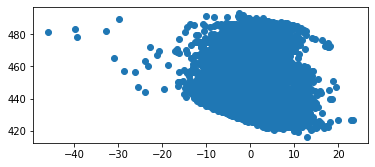

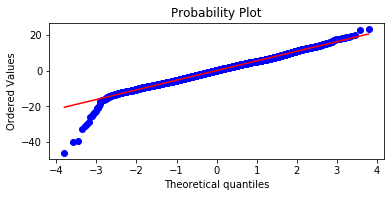

In [293]:
# rsquare

pred_val = model_fit.fittedvalues.copy()
true_val = data1['PE'].values.copy()
residual = true_val - pred_val

fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(residual, pred_val)

fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = stats.probplot(residual, plot=ax, fit=True)
r**2

In [294]:
import statsmodels.formula.api as sm

#between Vacuum and energy
model_fit = sm.ols('PE~V', data = data1).fit()
print((model_fit.summary()))

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Mon, 23 Dec 2019   Prob (F-statistic):               0.00
Time:                        10:22:44   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    517.8015      0.378   1370.218      0.0

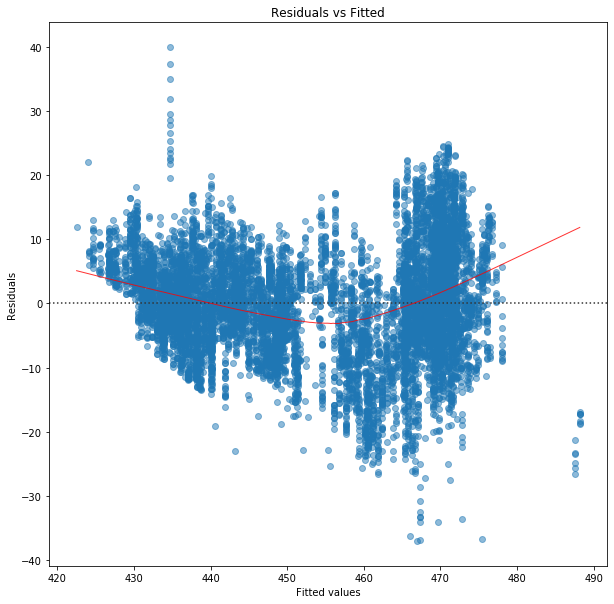

In [295]:
#residual and fitted

dataframe = pd.concat([data1["V"], data1["PE"]], axis=1)
model_fitted_y = model_fit.fittedvalues

plot_lm_V_PE = plt.figure(figsize = (10,10))
plot_lm_V_PE.axes[0] = sns.residplot(model_fitted_y, dataframe.columns[-1], data=dataframe,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_V_PE.axes[0].set_title('Residuals vs Fitted')
plot_lm_V_PE.axes[0].set_xlabel('Fitted values')
plot_lm_V_PE.axes[0].set_ylabel('Residuals');

0.9971121757708475

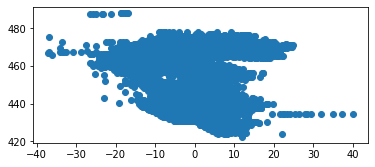

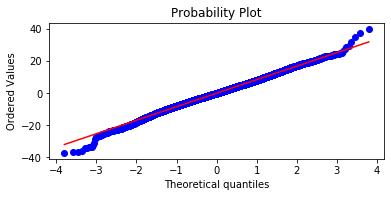

In [297]:
# rsquare

pred_val = model_fit.fittedvalues.copy()
true_val = data1['PE'].values.copy()
residual = true_val - pred_val

fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(residual, pred_val)

fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = stats.probplot(residual, plot=ax, fit=True)
r**2

In [298]:
import statsmodels.formula.api as sm

#between pressure and energy
model_fit = sm.ols('PE~AP', data = data1).fit()
print((model_fit.summary()))

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):               0.00
Time:                        10:25:00   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1055.2610     25.459    -41.449      0.0

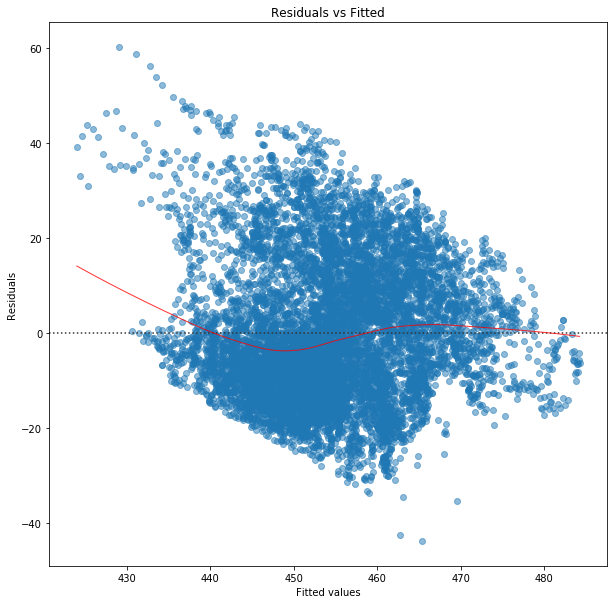

In [299]:
#residual and fitted

dataframe = pd.concat([data1["AP"], data1["PE"]], axis=1)
model_fitted_y = model_fit.fittedvalues

plot_lm_AP_PE = plt.figure(figsize = (10,10))
plot_lm_AP_PE.axes[0] = sns.residplot(model_fitted_y, dataframe.columns[-1], data=dataframe,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_AP_PE.axes[0].set_title('Residuals vs Fitted')
plot_lm_AP_PE.axes[0].set_xlabel('Fitted values')
plot_lm_AP_PE.axes[0].set_ylabel('Residuals');

0.9656630986146594

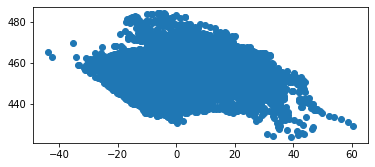

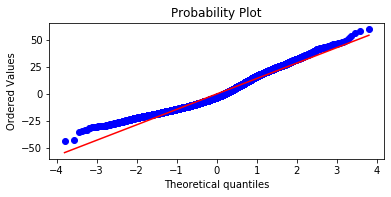

In [301]:
pred_val = model_fit.fittedvalues.copy()
true_val = data1['PE'].values.copy()
residual = true_val - pred_val

fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(residual, pred_val)

fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = stats.probplot(residual, plot=ax, fit=True)
r**2

In [302]:
import statsmodels.formula.api as sm

#between humid and energy
model_fit = sm.ols('PE~RH', data = data1).fit()
print((model_fit.summary()))

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):               0.00
Time:                        10:26:34   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    420.9618      0.823    511.676      0.0

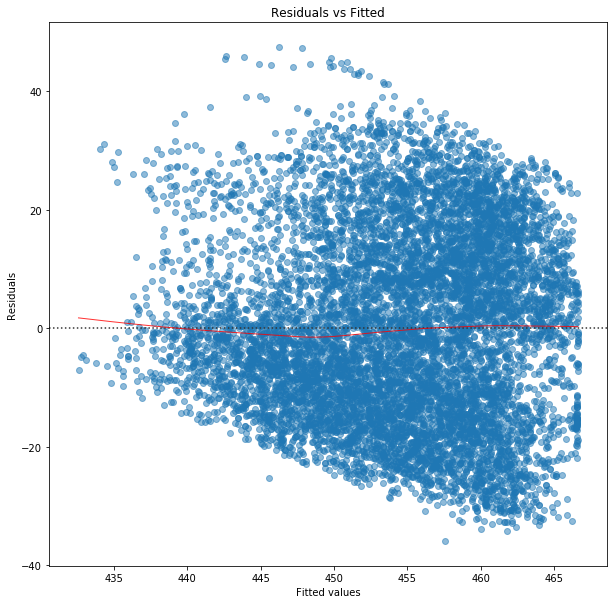

In [303]:
dataframe = pd.concat([data1["RH"], data1["PE"]], axis=1)
model_fitted_y = model_fit.fittedvalues

plot_lm_humid_PE = plt.figure(figsize = (10,10))
plot_lm_humid_PE.axes[0] = sns.residplot(model_fitted_y, dataframe.columns[-1], data=dataframe,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_humid_PE.axes[0].set_title('Residuals vs Fitted')
plot_lm_humid_PE.axes[0].set_xlabel('Fitted values')
plot_lm_humid_PE.axes[0].set_ylabel('Residuals');

0.9816762673596058

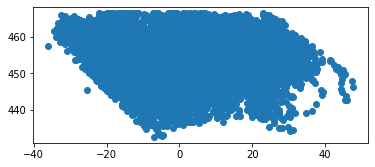

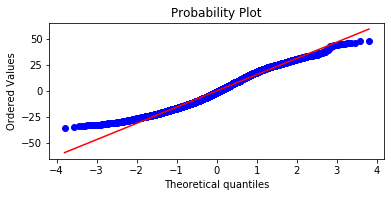

In [305]:
pred_val = model_fit.fittedvalues.copy()
true_val = data1['PE'].values.copy()
residual = true_val - pred_val

fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(residual, pred_val)

fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = stats.probplot(residual, plot=ax, fit=True)
r**2

## multivariable regression

In [306]:
model_fit = sm.ols('PE~AT+V+AP+RH', data = data1).fit()
print((model_fit.summary()))

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Mon, 23 Dec 2019   Prob (F-statistic):               0.00
Time:                        10:29:14   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    454.6093      9.749     46.634      0.0

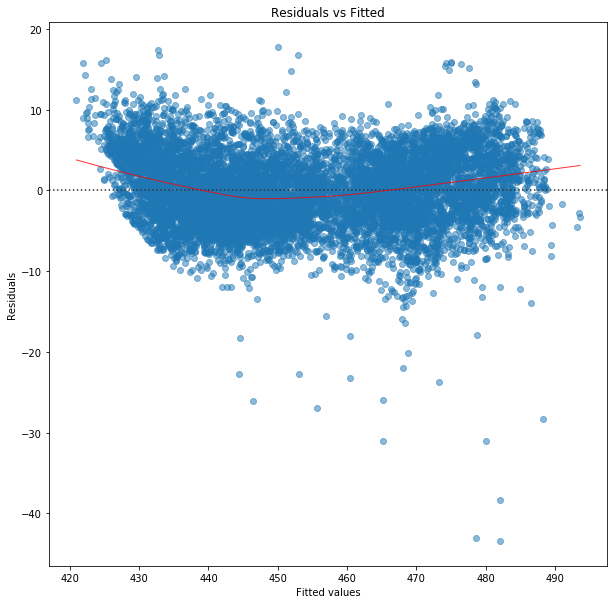

In [308]:
model_fitted_y = model_fit.fittedvalues
plot_lm_all = plt.figure(figsize = (10,10))
plot_lm_all.axes[0] = sns.residplot(model_fitted_y, y = data1["PE"], data=data1,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_all.axes[0].set_title('Residuals vs Fitted')
plot_lm_all.axes[0].set_xlabel('Fitted values')
plot_lm_all.axes[0].set_ylabel('Residuals');

0.9785411700903196

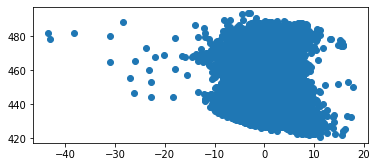

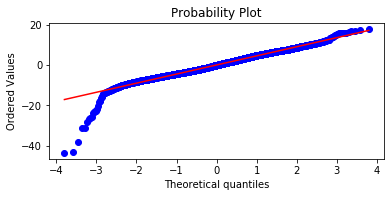

In [309]:
pred_val = model_fit.fittedvalues.copy()
true_val = data1['PE'].values.copy()
residual = true_val - pred_val

fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(residual, pred_val)

fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = stats.probplot(residual, plot=ax, fit=True)
r**2

In [0]:
def fitLine(x, y, alpha=0.05, newx=[], plotFlag=1):
    ''' Fit a curve to the data using a least squares 1st order polynomial fit '''
    
    # Summary data
    n = len(x)			   # number of samples     
    
    Sxx = np.sum(x**2) - np.sum(x)**2/n
#    Syy = np.sum(y**2) - np.sum(y)**2/n    # not needed here
    Sxy = np.sum(x*y) - np.sum(x)*np.sum(y)/n    
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    
    # Linefit
    b = Sxy/Sxx
    a = mean_y - b*mean_x
    
    # Residuals
    fit = lambda xx: a + b*xx    
    residuals = y - fit(x)
    
    var_res = np.sum(residuals**2)/(n-2)
    sd_res = np.sqrt(var_res)
    
    # Confidence intervals
    se_b = sd_res/np.sqrt(Sxx)
    se_a = sd_res*np.sqrt(np.sum(x**2)/(n*Sxx))
    
    df = n-2                            # degrees of freedom
    tval = stats.t.isf(alpha/2., df) 	# appropriate t value
    
    ci_a = a + tval*se_a*np.array([-1,1])
    ci_b = b + tval*se_b*np.array([-1,1])

    # create series of new test x-values to predict for
    npts = 100
    px = np.linspace(np.min(x),np.max(x),num=npts)
    
    se_fit     = lambda x: sd_res * np.sqrt(  1./n + (x-mean_x)**2/Sxx)
    se_predict = lambda x: sd_res * np.sqrt(1+1./n + (x-mean_x)**2/Sxx)
    
    print(('Summary: a={0:5.4f}+/-{1:5.4f}, b={2:5.4f}+/-{3:5.4f}'.format(a,tval*se_a,b,tval*se_b)))
    print(('Confidence intervals: ci_a=({0:5.4f} - {1:5.4f}), ci_b=({2:5.4f} - {3:5.4f})'.format(ci_a[0], ci_a[1], ci_b[0], ci_b[1])))
    print(('Residuals: variance = {0:5.4f}, standard deviation = {1:5.4f}'.format(var_res, sd_res)))
    print(('alpha = {0:.3f}, tval = {1:5.4f}, df={2:d}'.format(alpha, tval, df)))
    
    # Return info
    ri = {'residuals': residuals, 
        'var_res': var_res,
        'sd_res': sd_res,
        'alpha': alpha,
        'tval': tval,
        'df': df}
    
    if plotFlag == 1:
        # Plot the data
        plt.figure()
        
        plt.plot(px, fit(px),'k', label='Regression line')
        #plt.plot(x,y,'k.', label='Sample observations', ms=10)
        plt.plot(x,y,'k.')
        
        x.sort_values()
        limit = (1-alpha)*100
        plt.plot(x, fit(x)+tval*se_fit(x), 'r--', lw=2, label='Confidence limit ({0:.1f}%)'.format(limit))
        plt.plot(x, fit(x)-tval*se_fit(x), 'r--', lw=2 )
        
        plt.plot(x, fit(x)+tval*se_predict(x), '--', lw=2, color=(0.2,1,0.2), label='Prediction limit ({0:.1f}%)'.format(limit))
        plt.plot(x, fit(x)-tval*se_predict(x), '--', lw=2, color=(0.2,1,0.2))

        plt.xlabel('X values')
        plt.ylabel('Y values')
        plt.title('Linear regression and confidence limits')
        
        # configure legend
        plt.legend(loc=0)
        leg = plt.gca().get_legend()
        ltext = leg.get_texts()
        plt.setp(ltext, fontsize=14)

        # show the plot
        outFile = 'regression_wLegend.png'
        plt.savefig(outFile, dpi=200)
        print('Image saved to {0}'.format(outFile))
        plt.show()
        
    if newx != []:
        try:
            newx.size
        except AttributeError:
            newx = np.array([newx])
    
        print(('Example: x = {0}+/-{1} => se_fit = {2:5.4f}, se_predict = {3:6.5f}'\
        .format(newx[0], tval*se_predict(newx[0]), se_fit(newx[0]), se_predict(newx[0]))))
        
        newy = (fit(newx), fit(newx)-se_predict(newx), fit(newx)+se_predict(newx))
        return (a,b,(ci_a, ci_b), ri, newy)
    else:
        return (a,b,(ci_a, ci_b), ri)  

Summary: a=497.0341+/-0.4030, b=-2.1713+/-0.0192
Confidence intervals: ci_a=(496.6311 - 497.4371), ci_b=(-2.1905 - -2.1521)
Residuals: variance = 29.4379, standard deviation = 5.4257
alpha = 0.010, tval = 2.5763, df=9566
Image saved to regression_wLegend.png


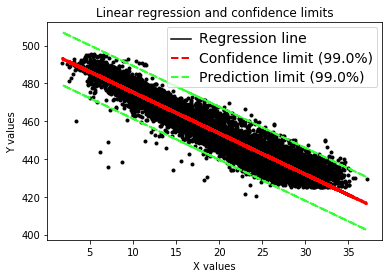

Example: x = 1.0+/-13.983684744170214 => se_fit = 0.1495, se_predict = 5.42773


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:86: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


In [311]:
goodIndex = np.invert(np.logical_or(np.isnan(data1["AT"]), np.isnan(data1["PE"])))
(a,b,(ci_a, ci_b), ri,newy) = fitLine(data1["AT"],data1["PE"], alpha=0.01,newx=np.array([1,4.5])) 

Summary: a=517.8015+/-0.9736, b=-1.1681+/-0.0175
Confidence intervals: ci_a=(516.8279 - 518.7751), ci_b=(-1.1856 - -1.1507)
Residuals: variance = 70.9295, standard deviation = 8.4220
alpha = 0.010, tval = 2.5763, df=9566
Image saved to regression_wLegend.png


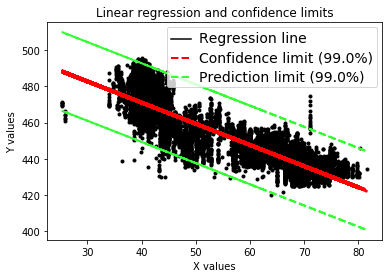

Example: x = 1.0+/-21.71894787864731 => se_fit = 0.3713, se_predict = 8.43014


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:86: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


In [312]:
goodIndex = np.invert(np.logical_or(np.isnan(data1["V"]), np.isnan(data1["PE"])))
(a,b,(ci_a, ci_b), ri,newy) = fitLine(data1["V"],data1["PE"], alpha=0.01,newx=np.array([1,4.5]))  

Summary: a=-1055.2610+/-65.5924, b=1.4899+/-0.0647
Confidence intervals: ci_a=(-1120.8534 - -989.6686), ci_b=(1.4251 - 1.5546)
Residuals: variance = 213.0170, standard deviation = 14.5951
alpha = 0.010, tval = 2.5763, df=9566
Image saved to regression_wLegend.png


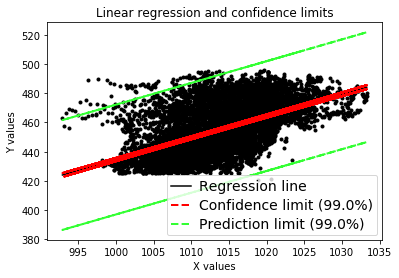

Example: x = 1.0+/-75.54988002370683 => se_fit = 25.4344, se_predict = 29.32446


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:86: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


In [313]:
goodIndex = np.invert(np.logical_or(np.isnan(data1["AP"]), np.isnan(data1["PE"])))
(a,b,(ci_a, ci_b), ri,newy) = fitLine(data1["AP"],data1["PE"], alpha=0.01,newx=np.array([1,4.5]))    

Summary: a=420.9618+/-2.1196, b=0.4557+/-0.0284
Confidence intervals: ci_a=(418.8422 - 423.0814), ci_b=(0.4273 - 0.4840)
Residuals: variance = 247.0509, standard deviation = 15.7179
alpha = 0.010, tval = 2.5763, df=9566
Image saved to regression_wLegend.png


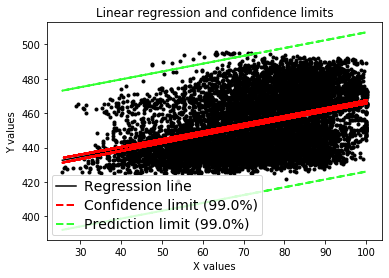

Example: x = 1.0+/-40.54857395344928 => se_fit = 0.8119, se_predict = 15.73881


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:86: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


In [314]:
goodIndex = np.invert(np.logical_or(np.isnan(data1["RH"]), np.isnan(data1["PE"])))
(a,b,(ci_a, ci_b), ri,newy) = fitLine(data1["RH"],data1["PE"], alpha=0.01,newx=np.array([1,4.5]))    